In [1]:
pip install statsmodels==0.12.2


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import the necessary modules
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.contingency_tables import mcnemar
from scipy import stats
import warnings
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Disable warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [3]:
#imports the dataset
df = pd.read_csv("Diabetes Dataset.csv")
df.sample(7)

ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
427  523      34549      F   63   2.8  54   11.2   4.2  1.1  1.7  1.4   2.0   
46    96      42585      F   43   4.0  54    4.3   4.1  1.1  1.2  2.4   1.3   
539  652     780087      M   33   3.3  76    9.7   2.4  1.9  0.8  2.5  13.1   
316  776      34435      F   63   6.1  46    9.8   3.9  0.8  1.8  1.9   1.0   
538  452      34253      M   50   7.7  67    4.0   5.2  2.1  1.1  3.2   0.9   
239  368      24094      F   60   3.0  42    6.2   5.8  0.9  1.0  4.4   0.4   
900  611      34569      M   55   9.0  66    8.3   5.7  2.6  0.7  4.1   1.1   

       BMI CLASS  
427  36.00     Y  
46   24.50     N  
539  21.17     Y  
316  37.00     Y  
538  23.00     Y  
239  27.00     Y  
900  38.00     Y

In [4]:
df.shape

(1000, 14)

# Data Cleaning

In [5]:
#checks null value
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [6]:
#checks duplicate value
df.duplicated().sum()

0

# Exploratory Data Analysis for Statistics

In [7]:
#checks shape of the dataframe
df.shape

(1000, 14)

In [8]:
#checks the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [9]:
#finds descriptive statistics
df.describe().T

count           mean           std    min       25%      50%  \
ID         1000.0     340.500000  2.403977e+02    1.0    125.75    300.5   
No_Pation  1000.0  270551.408000  3.380758e+06  123.0  24063.75  34395.5   
AGE        1000.0      53.528000  8.799241e+00   20.0     51.00     55.0   
Urea       1000.0       5.124743  2.935165e+00    0.5      3.70      4.6   
Cr         1000.0      68.943000  5.998475e+01    6.0     48.00     60.0   
HbA1c      1000.0       8.281160  2.534003e+00    0.9      6.50      8.0   
Chol       1000.0       4.862820  1.301738e+00    0.0      4.00      4.8   
TG         1000.0       2.349610  1.401176e+00    0.3      1.50      2.0   
HDL        1000.0       1.204750  6.604136e-01    0.2      0.90      1.1   
LDL        1000.0       2.609790  1.115102e+00    0.3      1.80      2.5   
VLDL       1000.0       1.854700  3.663599e+00    0.1      0.70      0.9   
BMI        1000.0      29.578020  4.962388e+00   19.0     26.00     30.0   

                75%          max  
ID           550.25       800.00  
No_Pation  45384.25  75435657.00  
AGE           59.00        79.00  
Urea           5.70        38.90  
Cr            73.00       800.00  
HbA1c         10.20        16.00  
Chol           5.60        10.30  
TG             2.90        13.80  
HDL            1.30         9.90  
LDL            3.30         9.90  
VLDL           1.50        35.00  
BMI           33.00        47.75

In [10]:
# Create a list of dummy variables
dummy_vars = pd.get_dummies(df['Gender'], prefix='Gender')

# Add the dummy variables to the original DataFrame
df_diabetes = pd.concat([df, dummy_vars], axis=1)

# Remove the original 'Gender' column from the DataFrame
df_diabetes.drop('Gender', axis=1, inplace=True)

# Print the first five rows of the resulting DataFrame
print(df_diabetes.sample(7))


      ID  No_Pation  AGE  Urea   Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  \
766   53      34454   63   6.6   64    9.4   4.0  0.9  0.9  4.0   0.4  27.0   
246   55      34353   54   4.3   55   11.0   3.4  3.0  0.9  3.5   0.9  31.0   
821  560      35256   62   5.0   63   12.2   3.6  5.1  0.9  2.5   0.9  30.0   
507  188     454316   75  10.3  113    8.6   4.2  1.6  0.9  2.6   0.7  32.0   
361  327      43671   62   9.6   66   10.7   5.3  2.7  0.7  2.1   1.2  29.0   
772  584        234   59   4.2   56   10.5   4.9  2.1  1.1  2.5   0.9  28.0   
961  112      54656   55   6.9   80    9.8   7.3  1.2  1.5  1.6   0.5  29.0   

    CLASS  Gender_F  Gender_M  
766     Y         0         1  
246     Y         1         0  
821     Y         0         1  
507     Y         1         0  
361     Y         1         0  
772     Y         0         1  
961     Y         0         1  


In [11]:
#checks shape after one hot encoding
df_diabetes.shape

(1000, 15)

In [12]:
#checks the types of unique value present in class column
df_diabetes.CLASS.unique()

array(['N', 'P', 'Y'], dtype=object)

In [13]:
# Create a boolean mask for filtering the DataFrame
mask = df_diabetes['CLASS'] != 'P'

# Apply the mask to the original DataFrame to create a new DataFrame
df_diabetes_mask = df_diabetes[mask]

# Print the first five rows of the resulting DataFrame
print(df_diabetes_mask.head())


    ID  No_Pation  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  \
0  502      17975   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
1  420      47975   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
2  680      87656   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
3  634      34224   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4  21.0   
4  721      34225   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6  24.0   

  CLASS  Gender_F  Gender_M  
0     N         1         0  
1     N         1         0  
2     N         1         0  
3     N         1         0  
4     N         1         0  


In [14]:
df_diabetes_mask.shape

(947, 15)

In [15]:
# Create a dictionary to map the values
class_map = {'N': 0, 'Y': 1}

# Use the map() method to apply the mapping to the 'CLASS' column, with a default value of -1
df_diabetes_mask['CLASS'] = df_diabetes_mask['CLASS'].map(class_map).fillna(-1)

# Print the first five rows of the resulting DataFrame
print(df_diabetes_mask.sample(17))



      ID  No_Pation  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  \
61   181     454316   50   3.3  70    4.9   3.7  0.9  1.2  2.7   0.6  24.0   
623  341      24085   55   4.8  63    5.7   3.4  0.7  1.1  2.0   0.3  30.1   
622  338      24084   54   4.2  48    6.5   2.4  1.0  1.0  0.9   0.7  33.0   
980  170      45395   50   4.8  70    8.0   5.2  2.7  1.4  2.7   1.2  20.0   
700  406      34393   54   3.7  87    8.0   4.5  2.2  0.5  3.1   1.0  26.0   
183  750      34244   49   2.2  23    4.0   6.6  3.8  1.0  4.1   1.7  23.0   
742    2      44835   60   2.1  56    7.6   3.3  1.7  0.9  1.7   0.8  36.6   
249  395      24103   54   4.3  55   11.0   3.4  3.0  0.9  3.5   0.9  31.0   
865  124      48938   55   5.3  49   10.5   5.6  5.5  0.7  2.6   2.5  32.0   
795   93      24002   59   4.0  56   10.0   4.9  2.1  1.1  2.5   0.9  28.0   
336  558       3525   61   5.1  72   11.5   4.4  2.1  1.1  2.5   0.9  26.0   
963  116    7565435   63   3.4  52    8.8   5.8  1.7  1.1  3.9  

In [16]:
df_diabetes_mask.shape

(947, 15)

In [17]:
# Create a list of column names to drop
cols_to_drop = ['ID', 'No_Pation']

# Use the drop() method to remove the columns from diabetes_df
df_diabetes_mask = df_diabetes_mask.drop(cols_to_drop, axis=1)


In [18]:
df_diabetes_mask.head()

AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  CLASS  Gender_F  \
0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0         1   
1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0         1   
2   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0         1   
3   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4  21.0      0         1   
4   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6  24.0      0         1   

   Gender_M  
0         0  
1         0  
2         0  
3         0  
4         0

In [19]:
df_diabetes_mask.shape

(947, 13)

# Outlier Detection and Remove from the dataset

In [20]:
# Compute the z-scores of each column in the dataframe
z_scores = np.abs(stats.zscore(df_diabetes_mask))

# Identify the outliers based on a threshold of 3 for the z-scores
outlier_threshold = 2.9
is_outlier = (z_scores > outlier_threshold).any(axis=1)

# Print the rows that contain outliers
print(df_diabetes_mask[is_outlier])

     AGE  Urea   Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  CLASS  Gender_F  \
15    49  13.5  175    5.1   0.5  1.9  1.3  2.8   0.8  24.0      0         1   
28    44   3.0   39    5.5   9.5  1.7  1.3  2.5   0.6  21.0      0         1   
30    44   3.0   39    5.5   9.5  1.7  1.3  2.5   0.6  21.0      0         1   
48    35   3.3   44    5.0   4.1  1.9  4.0  1.3   0.7  23.0      0         1   
51    57   4.6   97    0.9   3.2  1.3  0.9  3.0   1.1  22.0      0         1   
..   ...   ...  ...    ...   ...  ...  ...  ...   ...   ...    ...       ...   
958   51   2.5   55   13.0   6.3  7.2  1.2  3.3   2.8  35.0      1         0   
969   26   7.5   79    8.8   3.5  2.0  2.0  0.9   0.5  28.0      1         0   
993   28   3.5   61    8.5   4.5  1.9  1.1  2.6   0.8  37.0      1         0   
996   31   3.0   60   12.3   4.1  2.2  0.7  2.4  15.4  37.2      1         0   
998   38   5.8   59    6.7   5.3  2.0  1.6  2.9  14.0  40.5      1         0   

     Gender_M  
15          0  
28     

In [21]:
# Select the rows that do not contain outliers
df_diabetes_mask_no_outliers = df_diabetes_mask[~is_outlier]

# Print the resulting DataFrame
print(df_diabetes_mask_no_outliers.sample(7))

     AGE  Urea  Cr  HbA1c  Chol   TG   HDL  LDL  VLDL   BMI  CLASS  Gender_F  \
339   55   6.2  52    9.3   5.6  3.7  1.30  1.5   2.0  36.0      1         1   
385   61   4.6  40   10.6   7.2  4.9  1.35  1.4   1.5  28.0      1         1   
922   51   3.5  72    7.0   5.4  1.5  1.00  3.7   0.7  27.0      1         0   
889   61   5.5  70    9.2   5.5  3.0  1.60  1.7   0.8  32.0      1         0   
717   55   4.9  56    7.7   3.0  0.3  1.30  1.5   0.1  30.0      1         0   
179   48   4.0  38    6.8   4.4  2.3  1.30  2.2   1.0  25.0      1         1   
644   77   6.2  99    7.2   3.2  1.1  0.80  2.0   0.5  29.0      1         0   

     Gender_M  
339         0  
385         0  
922         1  
889         1  
717         1  
179         0  
644         1  


In [22]:
df_diabetes_mask_no_outliers.shape

(831, 13)

<AxesSubplot:>

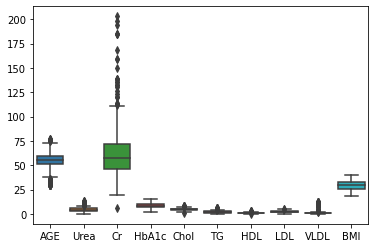

In [23]:
# Select the columns containing the numerical variables
numerical_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Create a boxplot of the numerical variables
sns.boxplot(data=df_diabetes_mask_no_outliers[numerical_cols])

In [24]:
df_diabetes_mask_no_outliers.sample(7)

AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  CLASS  Gender_F  \
18    39   3.2  55    5.0   4.6  1.3  1.0  3.0   0.6  21.0      0         1   
939   54   3.0  67    7.0   4.8  1.7  1.3  2.8   0.7  26.0      1         0   
995   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6  30.0      1         0   
570   73   4.3  79    6.0   5.3  1.4  1.5  3.2   0.6  27.0      1         0   
357   60   4.9  45   10.6   6.7  5.9  0.9  1.9   1.5  28.0      1         1   
657   60   5.7  76    6.8   5.5  1.5  0.7  4.1   0.7  33.0      1         0   
688   55   4.6  54    6.8   4.9  2.2  0.7  3.3   1.0  27.0      1         0   

     Gender_M  
18          0  
939         1  
995         1  
570         1  
357         0  
657         1  
688         1

In [25]:
# create a MaxAbsScaler object
scaler = MaxAbsScaler()

# fit and transform the data using the scaler
scaled_data = scaler.fit_transform(df_diabetes_mask_no_outliers)

# create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_diabetes_mask_no_outliers.columns)

In [26]:
df_scaled.shape

(831, 13)

In [27]:
df_scaled.sample(7)

AGE      Urea        Cr     HbA1c      Chol        TG       HDL  \
318  0.714286  0.300752  0.275862  0.626667  0.744186  0.650794  0.322581   
23   0.506494  0.451128  0.330049  0.266667  0.465116  0.095238  0.354839   
549  0.701299  0.473684  0.428571  0.546667  0.267442  0.111111  0.258065   
273  0.857143  0.413534  0.275862  0.660000  0.511628  0.317460  0.322581   
226  0.792208  0.308271  0.221675  0.533333  0.488372  0.142857  0.516129   
232  0.779221  0.443609  0.201970  0.440000  0.325581  0.428571  0.161290   
787  0.714286  0.353383  0.270936  0.453333  0.395349  0.269841  0.387097   

          LDL      VLDL    BMI  CLASS  Gender_F  Gender_M  
318  0.625000  0.149606  0.725    1.0       1.0       0.0  
23   0.464286  0.023622  0.550    0.0       1.0       0.0  
549  0.214286  0.023622  0.725    1.0       0.0       1.0  
273  0.446429  0.070866  0.725    1.0       1.0       0.0  
226  0.232143  0.118110  0.825    1.0       1.0       0.0  
232  0.196429  0.094488  0.700    1.0       1.0       0.0  
787  0.267857  0.031496  0.700    1.0       0.0       1.0

<AxesSubplot:>

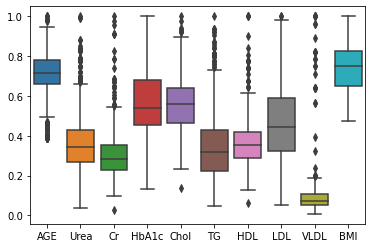

In [28]:
# Select the columns containing the numerical variables
numerical_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Create a boxplot of the numerical variables
sns.boxplot(data=df_scaled[numerical_cols])

# Visualisation of the Scaled Data

In [29]:
fig = px.scatter(df_scaled, x="Cr", y="Chol", color="CLASS", hover_name="AGE",
                 hover_data=["Urea", "HbA1c"],
                 labels={
                     "Cr": "Creatinine",
                     "Chol": "Cholesterol",
                     "CLASS": "Diabetes Class"
                 },
                 title="Scatter plot of Creatinine and Cholesterol by Diabetes Class")

fig.show()


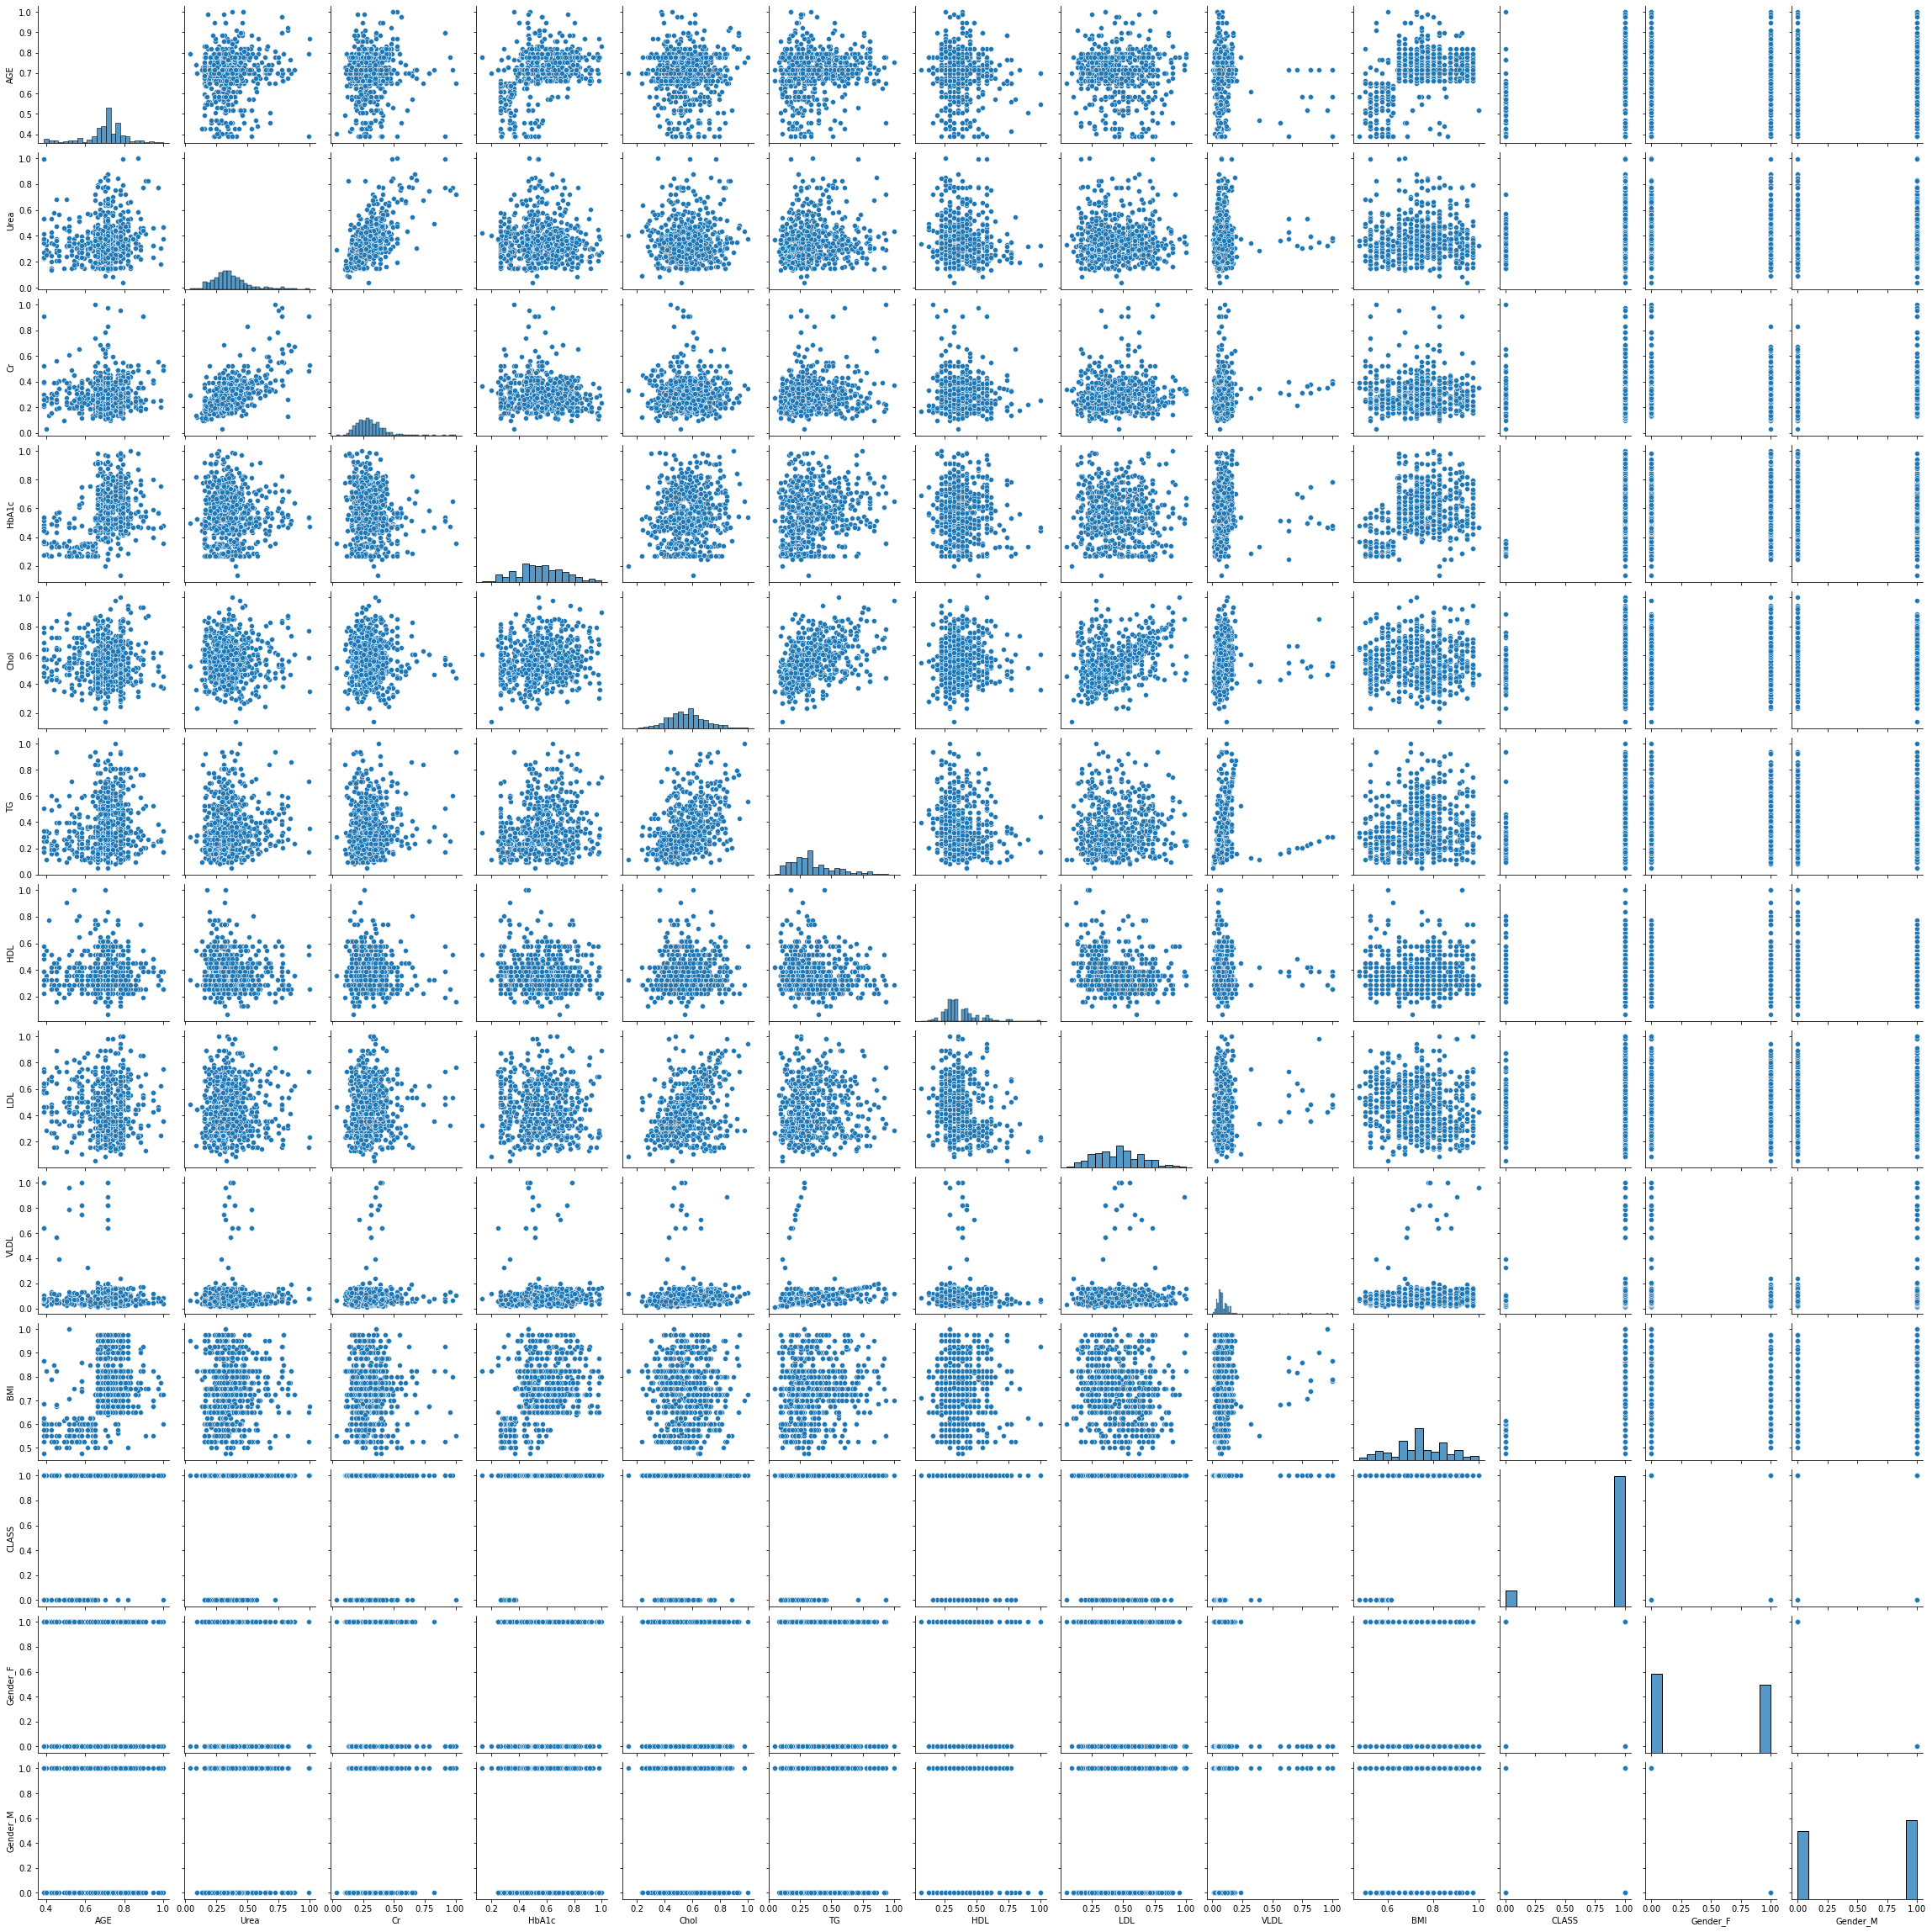

In [30]:
sns.pairplot(df_scaled)

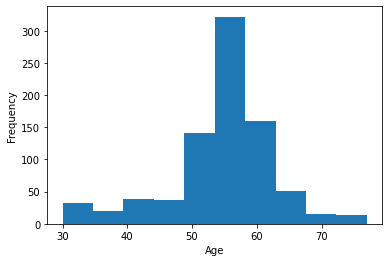

In [31]:
plt.hist(df_diabetes_mask_no_outliers['AGE'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

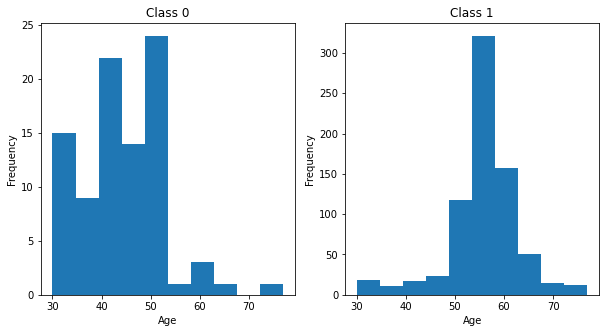

In [32]:
import matplotlib.pyplot as plt

# Split the dataframe into two based on the 'CLASS' column
class_0 = df_diabetes_mask_no_outliers[df_diabetes_mask_no_outliers['CLASS'] == 0]
class_1 = df_diabetes_mask_no_outliers[df_diabetes_mask_no_outliers['CLASS'] == 1]

# Create subplots for each class
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histograms for the 'AGE' column for each class
axs[0].hist(class_0['AGE'], bins=10)
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Class 0')

axs[1].hist(class_1['AGE'], bins=10)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Class 1')

# Show the plot
plt.show()


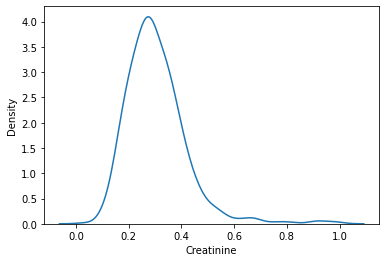

In [33]:
sns.kdeplot(df_scaled['Cr'])
plt.xlabel('Creatinine')
plt.ylabel('Density')
plt.show()

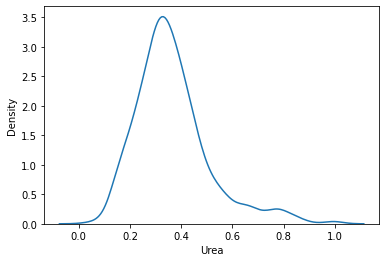

In [34]:
sns.kdeplot(df_scaled['Urea'])
plt.xlabel('Urea')
plt.ylabel('Density')
plt.show()

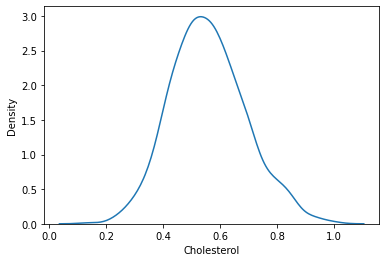

In [35]:
sns.kdeplot(df_scaled['Chol'])
plt.xlabel('Cholesterol')
plt.ylabel('Density')
plt.show()

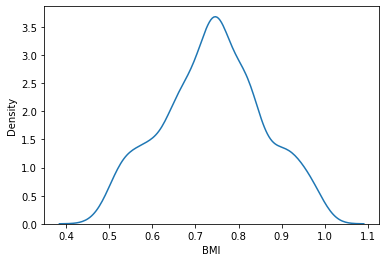

In [36]:
sns.kdeplot(df_scaled['BMI'])
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

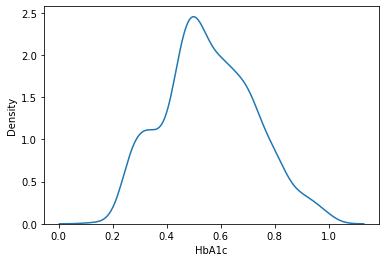

In [37]:
sns.kdeplot(df_scaled['HbA1c'])
plt.xlabel('HbA1c')
plt.ylabel('Density')
plt.show()

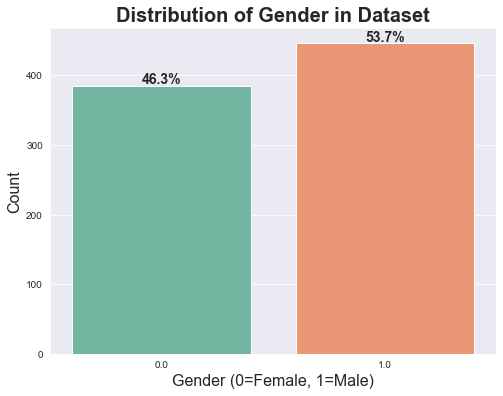

In [38]:
# Set style
sns.set_style("darkgrid")

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,6))

# Create countplot
sns.countplot(x="Gender_M", data=df_scaled, palette="Set2")

# Set titles and labels
ax.set_title("Distribution of Gender in Dataset", fontsize=20, fontweight="bold")
ax.set_xlabel("Gender (0=Female, 1=Male)", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

# Add annotations
total = float(len(df_scaled))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+3, '{:.1%}'.format(height/total), ha="center", fontsize=14, fontweight="bold")

# Show plot
plt.show()

# Count analysis of the response variable

In [39]:
#checks the count of diabatics cases based on Y and N
df_scaled["CLASS"].value_counts()

1.0    741
0.0     90
Name: CLASS, dtype: int64

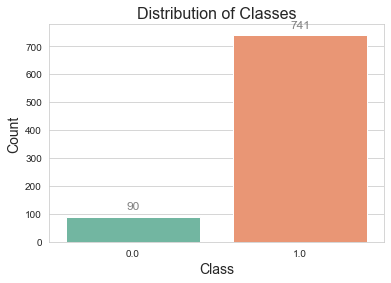

In [40]:
# Set the style and palette of the plot
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Create the countplot
ax = sns.countplot(x="CLASS", data=df_scaled)

# Add labels and titles
ax.set_xlabel("Class", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Distribution of Classes", fontsize=16)

# Add value labels to each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='gray', xytext=(0, 10),
                 textcoords='offset points')

# Show the plot
plt.show()

In [41]:
class_count = df_scaled["CLASS"].value_counts(normalize=True) * 100
print(class_count)

1.0    89.169675
0.0    10.830325
Name: CLASS, dtype: float64


# Now check the correlation among the independent variables

In [42]:
df_scaled.sample(7)

AGE      Urea        Cr     HbA1c      Chol        TG       HDL  \
674  0.701299  0.556391  0.413793  0.713333  0.476744  0.349206  0.290323   
27   0.428571  0.203008  0.231527  0.333333  0.488372  0.222222  0.419355   
529  1.000000  0.466165  0.487685  0.480000  0.372093  0.174603  0.258065   
549  0.701299  0.473684  0.428571  0.546667  0.267442  0.111111  0.258065   
155  0.662338  0.255639  0.152709  0.466667  0.523256  0.095238  0.354839   
522  0.727273  0.308271  0.334975  0.600000  0.837209  0.587302  0.225806   
514  0.714286  0.345865  0.379310  0.433333  0.697674  0.238095  0.419355   

          LDL      VLDL    BMI  CLASS  Gender_F  Gender_M  
674  0.392857  0.078740  0.725    1.0       0.0       1.0  
27   0.464286  0.055118  0.600    0.0       1.0       0.0  
529  0.357143  0.039370  0.725    1.0       0.0       1.0  
549  0.214286  0.023622  0.725    1.0       0.0       1.0  
155  0.553571  0.023622  0.975    1.0       1.0       0.0  
522  0.892857  0.125984  0.725    1.0       0.0       1.0  
514  0.732143  0.047244  0.750    1.0       0.0       1.0

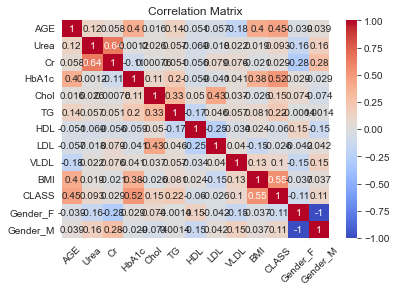

In [43]:
# Calculate the correlation matrix
corr_matrix = df_scaled.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Customize the plot
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

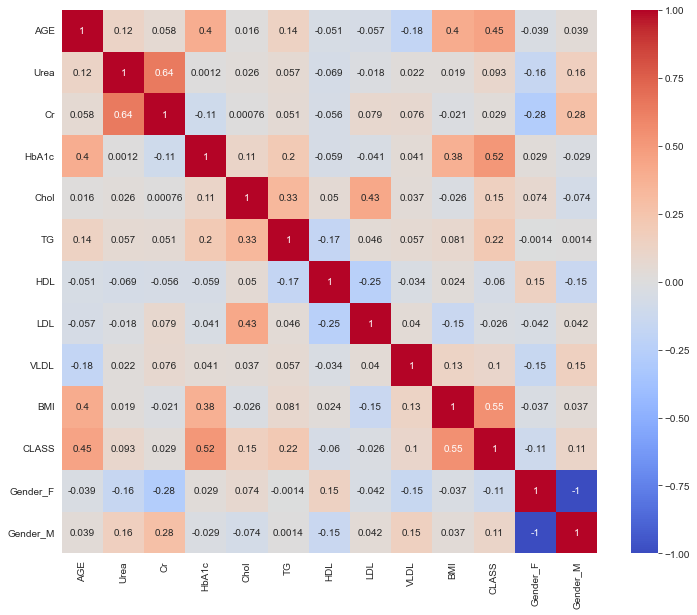

In [44]:
corr_matrix = df_scaled.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Training and Testing data 

In [45]:
df_scaled.sample(7)

AGE      Urea        Cr     HbA1c      Chol        TG       HDL  \
490  0.714286  0.406015  0.418719  0.646667  0.604651  0.285714  0.419355   
447  0.545455  0.345865  0.448276  0.300000  0.651163  0.333333  0.290323   
568  0.701299  0.353383  0.384236  0.486667  0.418605  0.269841  0.258065   
820  0.844156  0.375940  0.477833  0.466667  0.500000  0.682540  0.451613   
511  0.714286  0.360902  0.310345  0.380000  0.395349  0.111111  0.354839   
470  0.662338  0.488722  0.344828  0.486667  0.406977  0.285714  0.580645   
206  0.753247  0.375940  0.305419  0.620000  0.674419  0.571429  0.354839   

          LDL      VLDL     BMI  CLASS  Gender_F  Gender_M  
490  0.571429  0.062992  0.7500    1.0       0.0       1.0  
447  0.678571  0.070866  0.5500    1.0       0.0       1.0  
568  0.375000  0.055118  0.7250    1.0       0.0       1.0  
820  0.267857  0.157480  0.6750    1.0       0.0       1.0  
511  0.357143  0.023622  0.7525    1.0       0.0       1.0  
470  0.348214  0.062992  0.8000    1.0       0.0       1.0  
206  0.339286  0.047244  0.7750    1.0       1.0       0.0

In [46]:
#Splits the dataset into training and testing data
X = df_scaled.drop('CLASS', axis=1)
Y = df_scaled['CLASS']

In [47]:
X.sample(7)

AGE      Urea        Cr     HbA1c      Chol        TG       HDL  \
150  0.727273  0.413534  0.236453  0.620000  0.674419  0.380952  0.290323   
84   0.467532  0.248120  0.344828  0.280000  0.569767  0.396825  0.290323   
52   0.571429  0.548872  0.650246  0.286667  0.604651  0.301587  0.806452   
492  0.857143  0.308271  0.310345  0.673333  0.418605  0.809524  0.290323   
600  0.701299  0.503759  0.477833  0.633333  0.709302  0.365079  0.419355   
796  0.714286  0.518797  0.394089  0.653333  0.848837  0.190476  0.483871   
360  0.688312  0.323308  0.216749  0.586667  0.674419  0.269841  0.354839   

          LDL      VLDL    BMI  Gender_F  Gender_M  
150  0.696429  0.086614  0.750       1.0       0.0  
84   0.339286  0.055118  0.500       0.0       1.0  
52   0.535714  0.055118  0.525       1.0       0.0  
492  0.446429  0.070866  0.750       0.0       1.0  
600  0.250000  0.118110  0.750       0.0       1.0  
796  0.285714  0.039370  0.725       0.0       1.0  
360  0.696429  0.070866  0.950       1.0       0.0

In [48]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: CLASS, dtype: float64

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [50]:
# Fit the logistic regression model
model = sm.Logit(Y_train, sm.add_constant(X_train))
result = model.fit()

# Print the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.048715
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  CLASS   No. Observations:                  664
Model:                          Logit   Df Residuals:                      652
Method:                           MLE   Df Model:                           11
Date:                Mon, 08 May 2023   Pseudo R-squ.:                  0.8511
Time:                        10:58:33   Log-Likelihood:                -32.347
converged:                       True   LL-Null:                       -217.17
Covariance Type:            nonrobust   LLR p-value:                 1.676e-72
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.4857        nan        nan        nan         nan         nan
AGE            4.0601      2

In [51]:
# fit logistic regression model
logistic_model = sm.GLM(Y_train, sm.add_constant(X_train), family=sm.families.Binomial())
result = logistic_model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  CLASS   No. Observations:                  664
Model:                            GLM   Df Residuals:                      652
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32.347
Date:                Mon, 08 May 2023   Deviance:                       64.694
Time:                        10:58:33   Pearson chi2:                     110.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.4851      5.537     -5.145      0.0

Removing the variables which has p value more than or equal to 0.05

In [52]:
X_train_latest = X_train.drop(['AGE', 'Urea', 'Cr', 'HDL', 'LDL', 'VLDL'], axis=1)

In [53]:
X_train_latest.head()

HbA1c      Chol        TG    BMI  Gender_F  Gender_M
477  0.506667  0.546512  0.206349  0.650       0.0       1.0
346  0.960000  0.790698  0.460317  0.650       1.0       0.0
462  0.466667  0.639535  0.301587  0.825       0.0       1.0
670  0.646667  0.627907  0.380952  0.775       0.0       1.0
302  0.706667  0.837209  0.777778  0.700       1.0       0.0

In [54]:
logistic_model = sm.GLM(Y_train, sm.add_constant(X_train_latest), family=sm.families.Binomial())
result_latest = logistic_model.fit()
print(result_latest.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  CLASS   No. Observations:                  664
Model:                            GLM   Df Residuals:                      658
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36.032
Date:                Mon, 08 May 2023   Deviance:                       72.064
Time:                        10:58:33   Pearson chi2:                     82.5
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.4481      4.283     -5.708      0.0

# Wald Test

In [55]:
# Get the coefficient and standard error for all predictor variables
coefs = result_latest.params
std_errs = result_latest.bse

# Create empty lists to store Wald statistics and p-values
wald_stats = []
p_values = []

# Loop through all predictor variables and calculate Wald statistic and p-value
for predictor in X_train_latest.columns:
    coef = coefs[predictor]
    std_err = std_errs[predictor]
    wald_stat = (coef / std_err) ** 2
    p_value = 1 - stats.chi2.cdf(wald_stat, df=1)
    wald_stats.append(wald_stat)
    p_values.append(p_value)

# Create a dataframe to store the results
result_df = pd.DataFrame({'predictor': X_train_latest.columns, 'wald_stat': wald_stats, 'p_value': p_values})

# Print the results
print(result_df)

  predictor  wald_stat       p_value
0     HbA1c  23.197545  1.461838e-06
1      Chol  14.579378  1.343771e-04
2        TG   7.106491  7.680530e-03
3       BMI  20.596315  5.670515e-06
4  Gender_F  33.047834  8.991918e-09
5  Gender_M  30.752992  2.930516e-08


# Model Building

In [56]:
#Removes the variables which has p value greater than 0.05
X_test_latest = X_test.drop(['AGE', 'Urea', 'Cr', 'HDL', 'LDL', 'VLDL'], axis=1)

In [57]:
X_test_latest.head()

HbA1c      Chol        TG    BMI  Gender_F  Gender_M
610  0.506667  0.383721  0.269841  0.915       0.0       1.0
818  0.466667  0.872093  0.269841  0.750       0.0       1.0
290  0.620000  0.511628  0.333333  0.650       1.0       0.0
559  0.500000  0.418605  0.809524  0.750       0.0       1.0
168  0.413333  0.674419  0.142857  0.675       1.0       0.0

In [58]:
print(X_test_latest.shape[0])

167


In [59]:
print(Y_test.shape[0])

167


In [60]:
# Add a constant to the X_test_new dataset
X_test_latest = sm.add_constant(X_test_latest)

# Predict the class probabilities for the X_test_new dataset
Y_pred_prob = result_latest.predict(X_test_latest)

# Convert the class probabilities to class labels using a threshold of 0.5
Y_pred = [1 if p >= 0.5 else 0 for p in Y_pred_prob]

# Print the confusion matrix and classification report for the new model
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Confusion Matrix:
 [[ 22   1]
 [  3 141]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        23
         1.0       0.99      0.98      0.99       144

    accuracy                           0.98       167
   macro avg       0.94      0.97      0.95       167
weighted avg       0.98      0.98      0.98       167



## Deviance goodness of fit test: This test assesses the overall fit of the model by comparing the deviance of the model to the deviance of a saturated model (a model with perfect fit).

In [61]:
# Calculate the deviance of the model
model_deviance = result_latest.deviance

# Calculate the deviance of a saturated model
saturated_deviance = result_latest.null_deviance

# Calculate the degrees of freedom of the model
df_model = result_latest.df_model

# Calculate the degrees of freedom of the saturated model
df_saturated = len(Y_train) - 1

# Calculate the p-value using chi-square distribution
p_value = 1 - stats.chi2.cdf(model_deviance - saturated_deviance, df_model - df_saturated)

# Print the results
print("Deviance goodness of fit test:")
print(f"Model deviance: {model_deviance}")
print(f"Saturated deviance: {saturated_deviance}")
print(f"Degrees of freedom (model): {df_model}")
print(f"Degrees of freedom (saturated): {df_saturated}")
print(f"P-value: {p_value}")


Deviance goodness of fit test:
Model deviance: 72.06391259447341
Saturated deviance: 434.3408501155478
Degrees of freedom (model): 5
Degrees of freedom (saturated): 663
P-value: nan


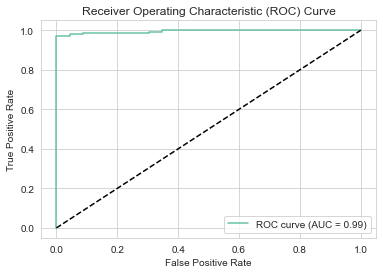

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

# Calculate the AUC score
auc_score = roc_auc_score(Y_test, Y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--') # Plot the random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


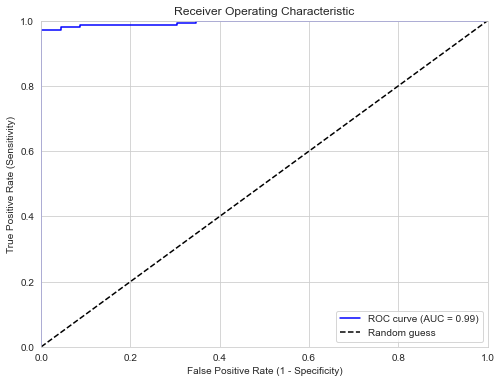

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

# Compute the area under the curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc, color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [64]:
# Get the coefficient values from the model
coef = result_latest.params

# Compute the odds ratios
odds_ratios = np.exp(coef)

# Print the odds ratios
print(odds_ratios)

const       2.411734e-11
HbA1c       1.329772e+09
Chol        7.205645e+04
TG          1.330955e+02
BMI         1.127011e+16
Gender_F    3.619254e-06
Gender_M    6.663621e-06
dtype: float64


## Confusion Matrix

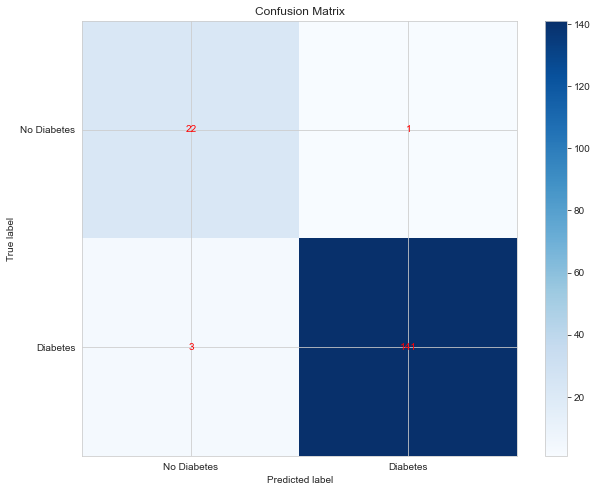

In [65]:
# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Define labels for the heatmap
labels = ["No Diabetes", "Diabetes"]

# Create a heatmap of the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cm, cmap="Blues")

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Add annotations
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, cm[i, j], ha="center", va="center", color="red")

# Add labels and title
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title("Confusion Matrix")
plt.show()


In [66]:
# Filter the "P" cases from the test set and select relevant columns
test_p_case = df_diabetes[df_diabetes['CLASS'] == 'P']
selected_columns = ['HbA1c', 'Chol', 'TG', 'BMI', 'Gender_F', 'Gender_M']
test_p_case = test_p_case[selected_columns]

# Scale the test data using a new scaler object fitted to the "class = P" test data
scaler_latest = MaxAbsScaler()
scaler_latest.fit(test_p_case)
test_p_case = scaler_latest.transform(test_p_case)

# Add an intercept term to the test data and predict probabilities using the logistic regression model
test_p_case = sm.add_constant(test_p_case)
p_case_prob = result_latest.predict(test_p_case)

# Convert the predicted probabilities to binary predictions and calculate accuracy
binary_predictions = (p_case_prob >= 0.5).astype(int)
accuracy_p_case = np.mean(binary_predictions == 1)

# Print the accuracy of the binary predictions for the "P" cases
print("Accuracy of binary predictions for the 'P' cases: {:.2f}%".format(accuracy_p_case * 100))

Accuracy of binary predictions for the 'P' cases: 100.00%


In [67]:
# Print the predicted probabilities for the "P" cases
print(p_case_prob)

[1.         0.99999999 1.         1.         0.99999999 1.
 0.99999999 0.99999999 0.99999999 0.99999999 1.         1.
 0.99999812 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99999999
 1.         0.99999996 1.         1.         0.99999987 1.
 1.         1.         1.         0.99999996 1.         1.
 0.99999977 1.         1.         0.99999977 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.99999997 1.         0.99999851 0.99999979]


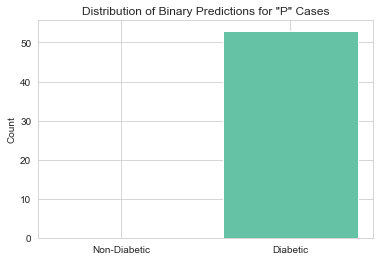

In [68]:
# Count the number of "P" cases predicted as diabetic (1) and non-diabetic (0)
counts = np.bincount(binary_predictions)

# Create a bar chart of the counts
fig, ax = plt.subplots()
ax.bar([0, 1], counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])
ax.set_ylabel('Count')
ax.set_title('Distribution of Binary Predictions for "P" Cases')

plt.show()